In [ ]:
import pandas as pd
import numpy as np

data= pd.read_excel("data/Results-28days-final.xlsx")
data

,Unnamed: 0,unique_id,ds,y,NBEATS,Informer,DLinear,PatchTST,iTransformer,NLinear,...,TimeMixer,TSMixer,TSMixerx,KAN,TimeGPT,Chronos,TimeLLM,timesfm,Morai,Timer
0,0,G620_water_level,2024-01-29,5.99,5.990283,6.446689,6.009546,5.999596,6.070791,6.007359,...,5.991134,6.003157,6.264428,5.974059,6.136990,5.938847,6.012373,6.348382,6.197403,6.309862
1,1,G620_water_level,2024-01-30,5.97,5.980088,6.428385,6.016413,5.993426,6.077047,5.990021,...,5.986139,5.998189,6.231063,5.963257,6.140436,5.885571,6.030017,6.313637,6.275898,6.306299
2,2,G620_water_level,2024-01-31,5.96,5.970243,6.399603,6.026046,5.985068,6.076143,5.983725,...,5.986710,5.991814,6.217189,5.963891,6.141627,5.877735,6.045658,6.216670,6.106342,6.299726
3,3,G620_water_level,2024-02-01,5.95,5.970322,6.383283,6.014894,5.977842,6.074499,5.977330,...,5.983805,5.985024,6.204739,5.950393,6.141416,5.862428,6.046127,6.201174,6.239551,6.283675
4,4,G620_water_level,2024-02-02,5.94,5.967651,6.365793,6.016383,5.971125,6.065646,5.966732,...,5.985395,5.978159,6.196633,5.949824,6.141319,5.857361,6.028793,6.137943,6.220164,6.279122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,7802,TSH_stage,2024-08-22,2.78,2.705861,3.284135,2.601946,2.604910,2.576495,2.660874,...,2.474700,2.664950,2.742459,2.428840,2.658305,2.778147,2.624435,2.500491,3.002488,2.409807
7803,7803,TSH_stage,2024-08-23,2.81,2.686831,3.247777,2.573833,2.603642,2.580112,2.645612,...,2.459051,2.658326,2.751494,2.403879,2.652127,2.792702,2.610139,2.500567,2.877229,2.433961
7804,7804,TSH_stage,2024-08-24,2.80,2.663762,3.213884,2.560354,2.600448,2.638836,2.631954,...,2.439607,2.649858,2.751780,2.411847,2.637871,2.746403,2.580557,2.444644,2.950637,2.441401
7805,7805,TSH_stage,2024-08-25,2.80,2.652651,3.181499,2.580595,2.604291,2.668186,2.626816,...,2.414936,2.645275,2.754015,2.391036,2.639326,2.719170,2.581784,2.496498,3.037005,2.461115


In [17]:
# Convert 'date' column to proper datetime format
data['date'] = pd.to_datetime(data['ds'])

# Verify the column types to confirm the 'date' is now datetime
print(data.info())

# When displaying or exporting, you can format the date as MM/DD/YYYY
data['formatted_date'] = data['date'].dt.strftime('%m/%d/%Y')

# Print the first few rows to see the formatted date
print(data[['date', 'formatted_date']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7807 entries, 0 to 7806
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    7807 non-null   int64         
 1   unique_id     7807 non-null   object        
 2   ds            7807 non-null   datetime64[ns]
 3   y             7807 non-null   float64       
 4   NBEATS        7807 non-null   float64       
 5   Informer      7807 non-null   float64       
 6   DLinear       7807 non-null   float64       
 7   PatchTST      7807 non-null   float64       
 8   iTransformer  7807 non-null   float64       
 9   NLinear       7807 non-null   float64       
 10  RMoK          7807 non-null   float64       
 11  TimeMixer     7807 non-null   float64       
 12  TSMixer       7807 non-null   float64       
 13  TSMixerx      7807 non-null   float64       
 14  KAN           7807 non-null   float64       
 15  TimeGPT       7807 non-null   float64 

In [18]:
# Drop the 'formatted_date' column if not needed
data = data.drop(columns=['Unnamed: 0','formatted_date'])

data['date'] = data['date'].dt.strftime('%m/%d/%Y')

# Check the data to confirm the index
data

,unique_id,ds,y,NBEATS,Informer,DLinear,PatchTST,iTransformer,NLinear,RMoK,...,TSMixer,TSMixerx,KAN,TimeGPT,Chronos,TimeLLM,timesfm,Morai,Timer,date
0,G620_water_level,2024-01-29,5.99,5.990283,6.446689,6.009546,5.999596,6.070791,6.007359,6.037122,...,6.003157,6.264428,5.974059,6.136990,5.938847,6.012373,6.348382,6.197403,6.309862,01/29/2024
1,G620_water_level,2024-01-30,5.97,5.980088,6.428385,6.016413,5.993426,6.077047,5.990021,6.034707,...,5.998189,6.231063,5.963257,6.140436,5.885571,6.030017,6.313637,6.275898,6.306299,01/30/2024
2,G620_water_level,2024-01-31,5.96,5.970243,6.399603,6.026046,5.985068,6.076143,5.983725,6.032871,...,5.991814,6.217189,5.963891,6.141627,5.877735,6.045658,6.216670,6.106342,6.299726,01/31/2024
3,G620_water_level,2024-02-01,5.95,5.970322,6.383283,6.014894,5.977842,6.074499,5.977330,6.023985,...,5.985024,6.204739,5.950393,6.141416,5.862428,6.046127,6.201174,6.239551,6.283675,02/01/2024
4,G620_water_level,2024-02-02,5.94,5.967651,6.365793,6.016383,5.971125,6.065646,5.966732,6.014345,...,5.978159,6.196633,5.949824,6.141319,5.857361,6.028793,6.137943,6.220164,6.279122,02/02/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,TSH_stage,2024-08-22,2.78,2.705861,3.284135,2.601946,2.604910,2.576495,2.660874,2.541839,...,2.664950,2.742459,2.428840,2.658305,2.778147,2.624435,2.500491,3.002488,2.409807,08/22/2024
7803,TSH_stage,2024-08-23,2.81,2.686831,3.247777,2.573833,2.603642,2.580112,2.645612,2.540648,...,2.658326,2.751494,2.403879,2.652127,2.792702,2.610139,2.500567,2.877229,2.433961,08/23/2024
7804,TSH_stage,2024-08-24,2.80,2.663762,3.213884,2.560354,2.600448,2.638836,2.631954,2.534780,...,2.649858,2.751780,2.411847,2.637871,2.746403,2.580557,2.444644,2.950637,2.441401,08/24/2024
7805,TSH_stage,2024-08-25,2.80,2.652651,3.181499,2.580595,2.604291,2.668186,2.626816,2.519340,...,2.645275,2.754015,2.391036,2.639326,2.719170,2.581784,2.496498,3.037005,2.461115,08/25/2024


In [19]:
# Drop the 'formatted_date' column if not needed
data = data.drop(columns=['ds'])
data

,unique_id,y,NBEATS,Informer,DLinear,PatchTST,iTransformer,NLinear,RMoK,TimeMixer,TSMixer,TSMixerx,KAN,TimeGPT,Chronos,TimeLLM,timesfm,Morai,Timer,date
0,G620_water_level,5.99,5.990283,6.446689,6.009546,5.999596,6.070791,6.007359,6.037122,5.991134,6.003157,6.264428,5.974059,6.136990,5.938847,6.012373,6.348382,6.197403,6.309862,01/29/2024
1,G620_water_level,5.97,5.980088,6.428385,6.016413,5.993426,6.077047,5.990021,6.034707,5.986139,5.998189,6.231063,5.963257,6.140436,5.885571,6.030017,6.313637,6.275898,6.306299,01/30/2024
2,G620_water_level,5.96,5.970243,6.399603,6.026046,5.985068,6.076143,5.983725,6.032871,5.986710,5.991814,6.217189,5.963891,6.141627,5.877735,6.045658,6.216670,6.106342,6.299726,01/31/2024
3,G620_water_level,5.95,5.970322,6.383283,6.014894,5.977842,6.074499,5.977330,6.023985,5.983805,5.985024,6.204739,5.950393,6.141416,5.862428,6.046127,6.201174,6.239551,6.283675,02/01/2024
4,G620_water_level,5.94,5.967651,6.365793,6.016383,5.971125,6.065646,5.966732,6.014345,5.985395,5.978159,6.196633,5.949824,6.141319,5.857361,6.028793,6.137943,6.220164,6.279122,02/02/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,TSH_stage,2.78,2.705861,3.284135,2.601946,2.604910,2.576495,2.660874,2.541839,2.474700,2.664950,2.742459,2.428840,2.658305,2.778147,2.624435,2.500491,3.002488,2.409807,08/22/2024
7803,TSH_stage,2.81,2.686831,3.247777,2.573833,2.603642,2.580112,2.645612,2.540648,2.459051,2.658326,2.751494,2.403879,2.652127,2.792702,2.610139,2.500567,2.877229,2.433961,08/23/2024
7804,TSH_stage,2.80,2.663762,3.213884,2.560354,2.600448,2.638836,2.631954,2.534780,2.439607,2.649858,2.751780,2.411847,2.637871,2.746403,2.580557,2.444644,2.950637,2.441401,08/24/2024
7805,TSH_stage,2.80,2.652651,3.181499,2.580595,2.604291,2.668186,2.626816,2.519340,2.414936,2.645275,2.754015,2.391036,2.639326,2.719170,2.581784,2.496498,3.037005,2.461115,08/25/2024


In [27]:
data.rename(columns={'Morai': 'Moirai'}, inplace=True)

/tmp/ipykernel_1661608/3447253437.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.rename(columns={'timesfm': 'TimesFM'}, inplace=True)


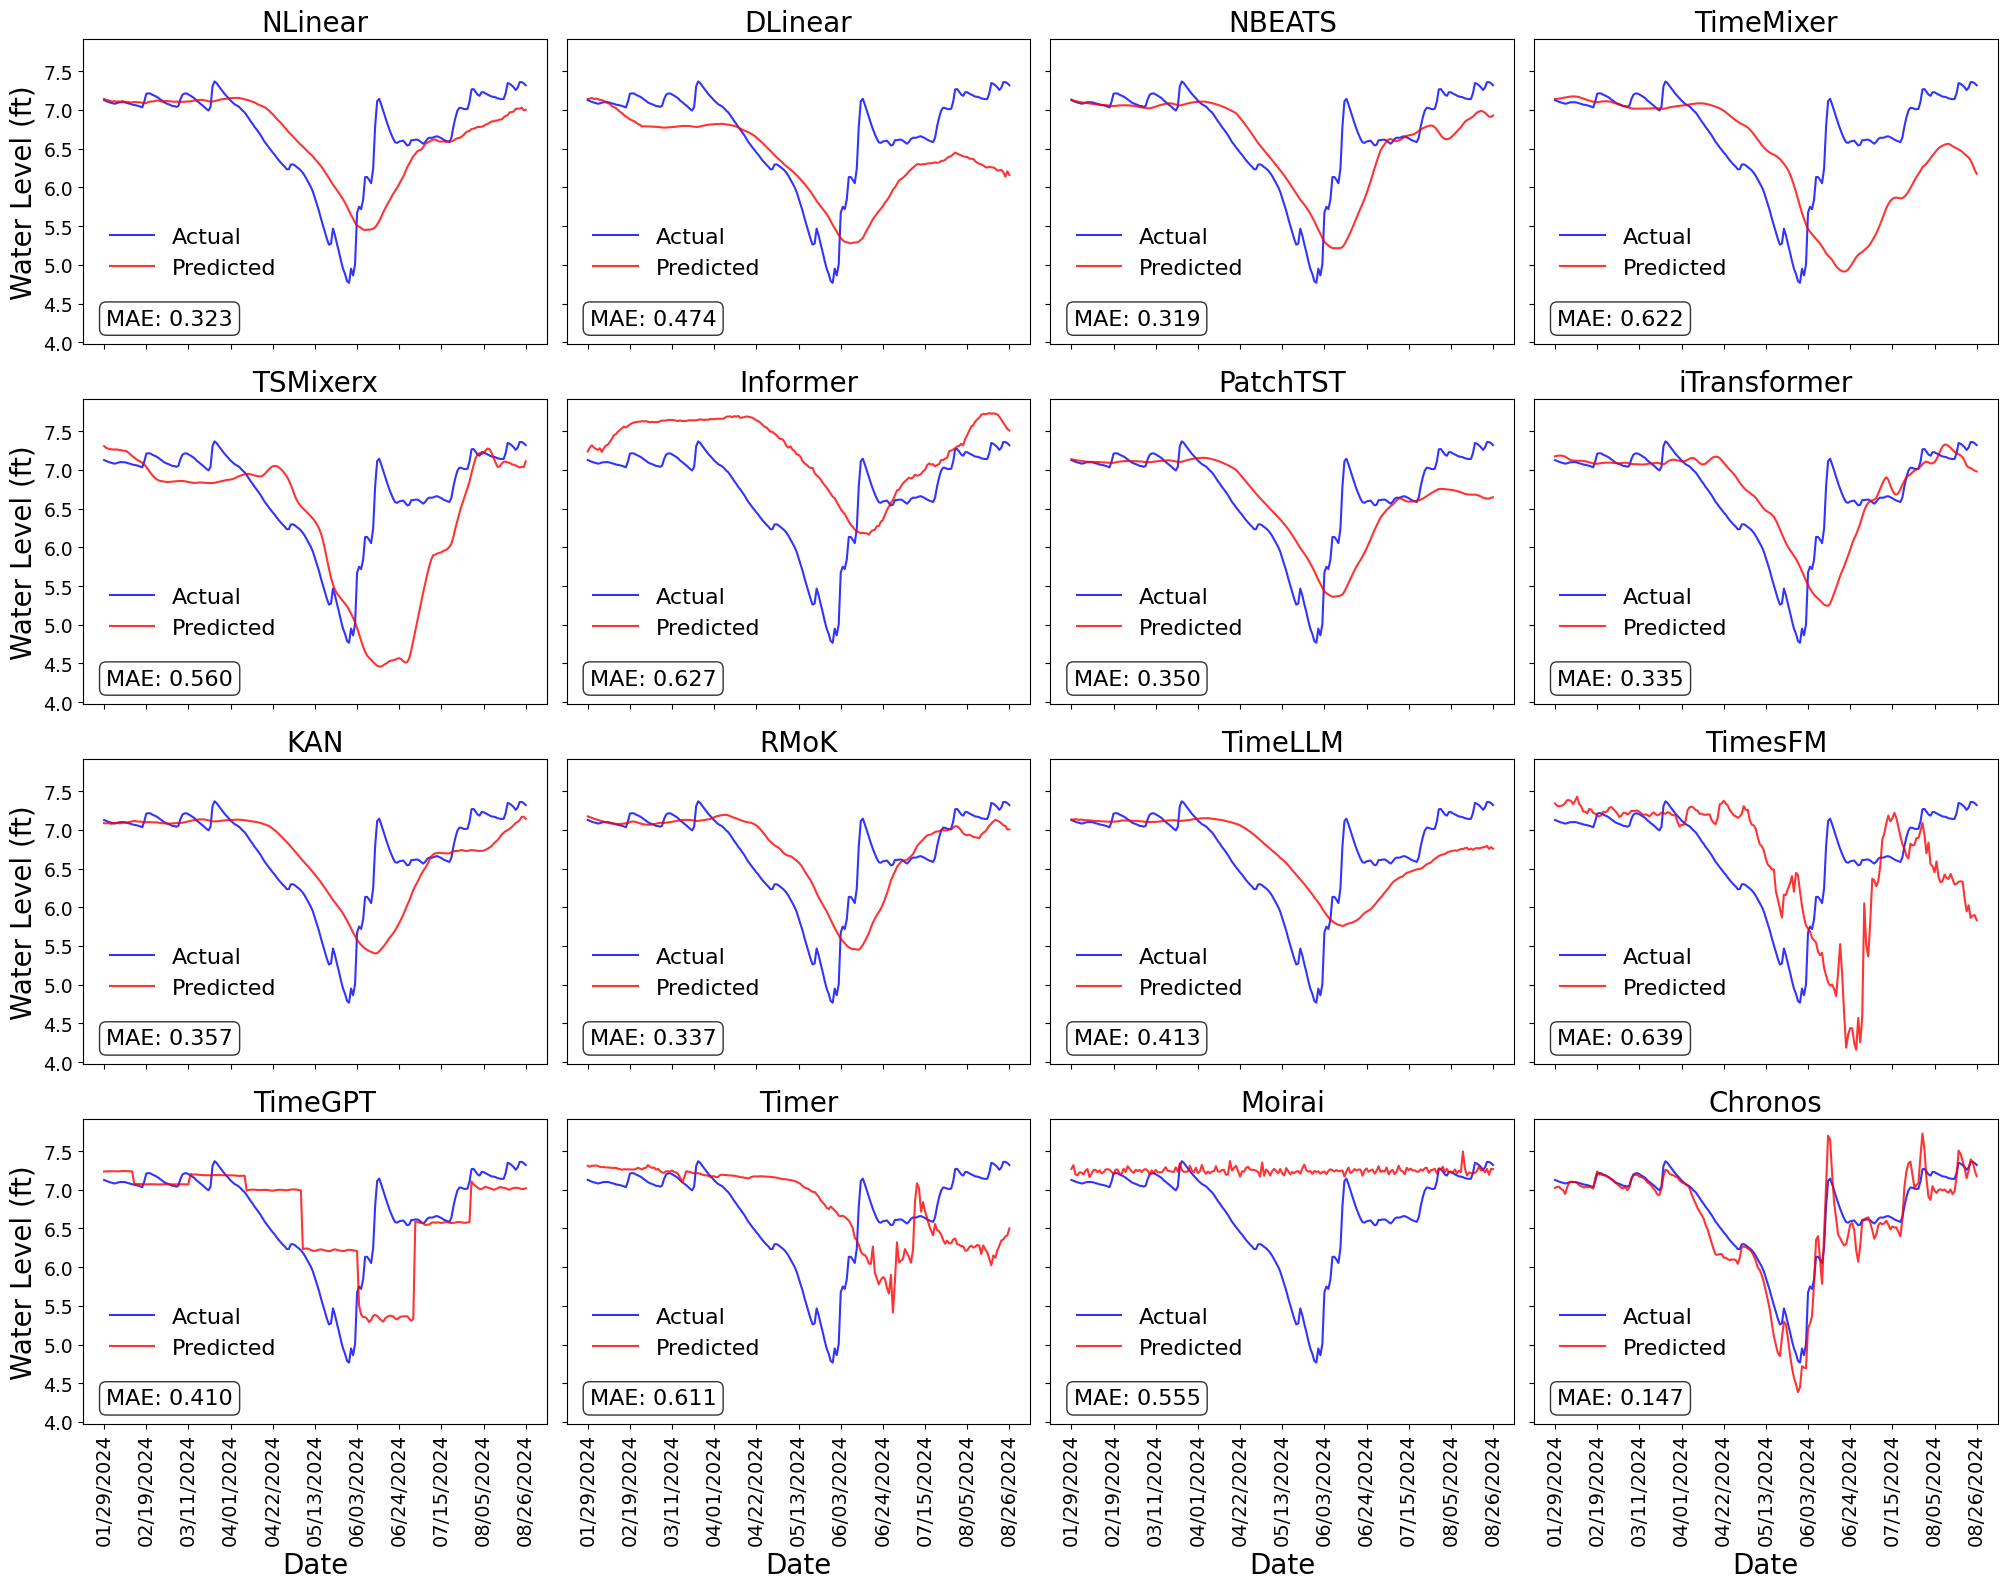

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Define models from dataset columns (excluding 'unique_id', 'ds', 'y', 'date')
model_columns = ["NLinear", "DLinear", "NBEATS", "TimeMixer", "TSMixerx", 
                 "Informer", "PatchTST", "iTransformer", "KAN", "RMoK", 
                 "TimeLLM", "TimesFM", "TimeGPT", "Timer", "Moirai", "Chronos"]

# Filter dataset for NP205_stage
filtered_dataset = data[data['unique_id'] == 'NP205_stage']
# Rename 'timesfm' to 'TimesFM'
# Rename only existing columns to avoid KeyError
filtered_dataset.rename(columns={'timesfm': 'TimesFM'}, inplace=True)

# Set up subplots (4 rows, 4 columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16), sharex=True, sharey=True) 
axes = axes.flatten()  # Flatten for easier iteration

# Loop through each model and plot predictions
for i, model in enumerate(model_columns):
    ax = axes[i]
    
    # Compute MAE
    mae = (filtered_dataset[model] - filtered_dataset['y']).abs().mean()
    
    # Plot actual vs. predicted values
    ax.plot(filtered_dataset['date'], filtered_dataset['y'], label='Actual', color='blue', alpha=0.8)
    ax.plot(filtered_dataset['date'], filtered_dataset[model], label=f'Predicted', color='red', alpha=0.8)
    
    # Title and formatting
    ax.set_title(f"{model}", fontsize=20)
    ax.legend(loc='lower right', fontsize=12)
    ax.set_ylabel('Water Level (ft)',fontsize=20 )
    ax.set_xlabel('Date', fontsize=20)

    # Position legend slightly above the bottom-left area without a box
    ax.legend(loc='lower left', fontsize=16, bbox_to_anchor=(0.014, 0.15), frameon=False)  

    # Add MAE annotation below the legend
    ax.text(0.05, 0.05, f"MAE: {mae:.3f}", transform=ax.transAxes, fontsize=16, color='black',
            verticalalignment='bottom', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.3'))
    
    # Reduce x-ticks for clarity
    xticks = ax.get_xticks()
    ax.set_xticks(xticks[::max(1, len(xticks)//10)])  # Show fewer ticks
    
    # Rotate x-axis labels and set font size
    ax.tick_params(axis='x', rotation=90, labelsize=14)  # Adjust the font size (change 12 to your preferred size)
    ax.tick_params(axis='y', labelsize=13.5)  # Adjust the font size for y-ticks

    # Hide x-labels on inner subplots to reduce clutter
    ax.label_outer()

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_1661608/3944238259.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.rename(columns={'timesfm': 'TimesFM'}, inplace=True)


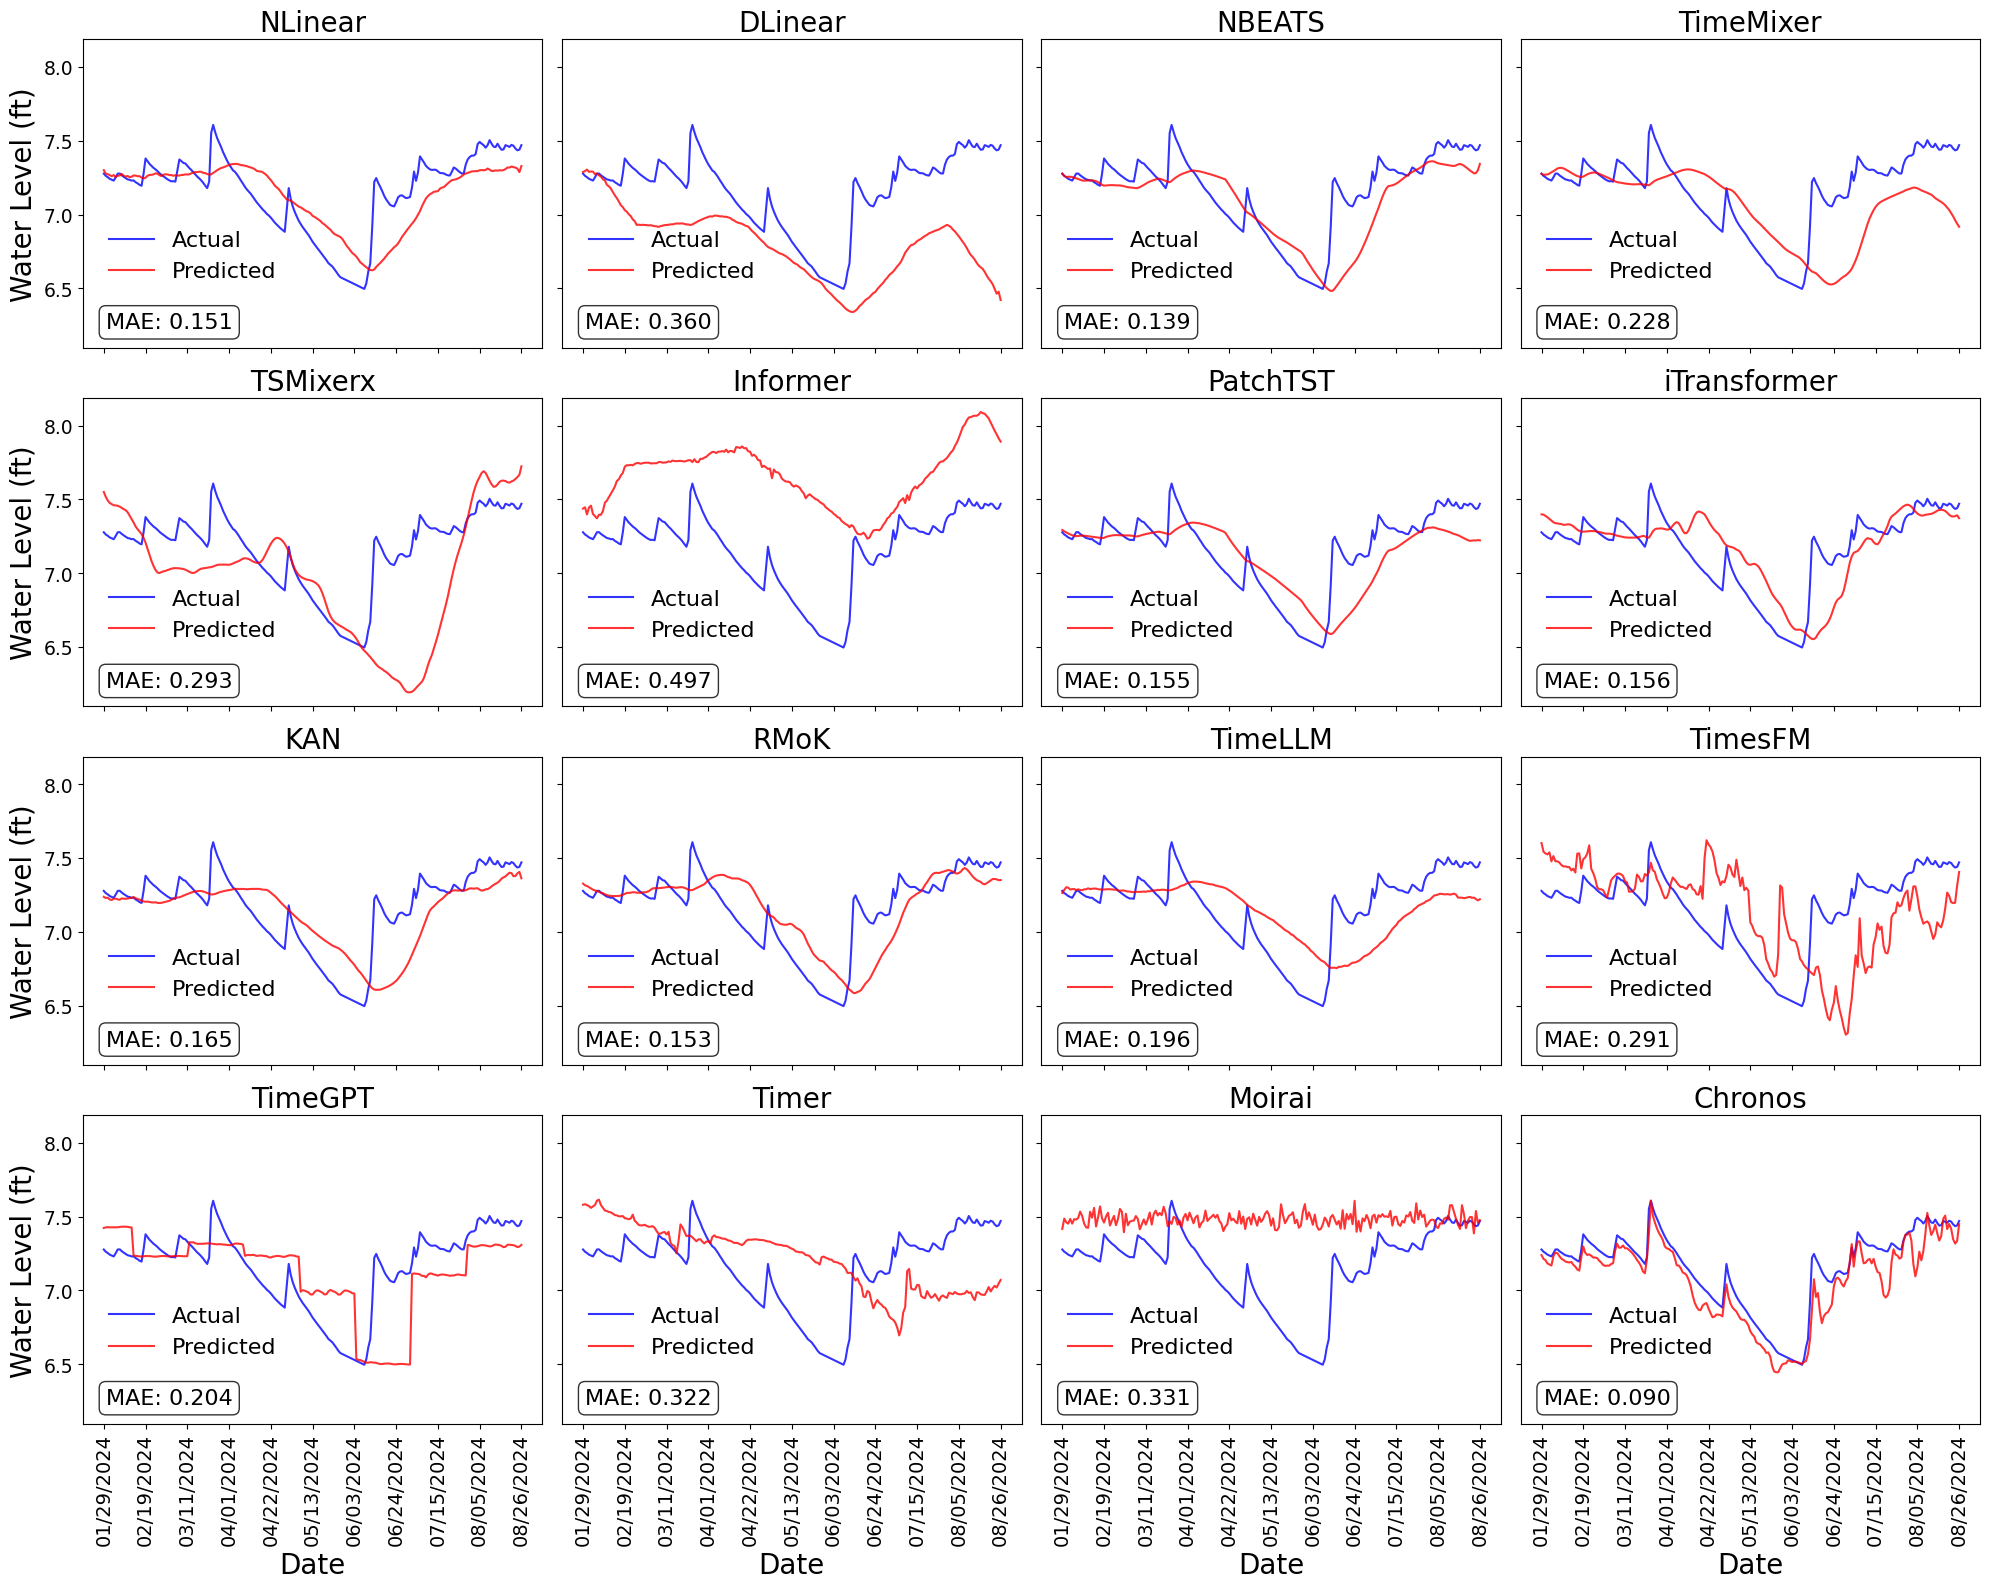

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Define models from dataset columns (excluding 'unique_id', 'ds', 'y', 'date')
model_columns = ["NLinear", "DLinear", "NBEATS", "TimeMixer", "TSMixerx", 
                 "Informer", "PatchTST", "iTransformer", "KAN", "RMoK", 
                 "TimeLLM", "TimesFM", "TimeGPT", "Timer", "Moirai", "Chronos"]

# Filter dataset for NP205_stage
filtered_dataset = data[data['unique_id'] == 'P33_stage']
# Rename 'timesfm' to 'TimesFM'
filtered_dataset.rename(columns={'timesfm': 'TimesFM'}, inplace=True)

# Set up subplots (4 rows, 4 columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16), sharex=True, sharey=True) 
axes = axes.flatten()  # Flatten for easier iteration

# Loop through each model and plot predictions
for i, model in enumerate(model_columns):
    ax = axes[i]
    
    # Compute MAE
    mae = (filtered_dataset[model] - filtered_dataset['y']).abs().mean()
    
    # Plot actual vs. predicted values
    ax.plot(filtered_dataset['date'], filtered_dataset['y'], label='Actual', color='blue', alpha=0.8)
    ax.plot(filtered_dataset['date'], filtered_dataset[model], label=f'Predicted', color='red', alpha=0.8)
    
    # Title and formatting
    ax.set_title(f"{model}", fontsize=20)
    ax.legend(loc='lower right', fontsize=12)
    ax.set_ylabel('Water Level (ft)',fontsize=20 )
    ax.set_xlabel('Date', fontsize=20)

    # Position legend slightly above the bottom-left area without a box
    ax.legend(loc='lower left', fontsize=16, bbox_to_anchor=(0.014, 0.15), frameon=False)  

    # Add MAE annotation below the legend
    ax.text(0.05, 0.05, f"MAE: {mae:.3f}", transform=ax.transAxes, fontsize=16, color='black',
            verticalalignment='bottom', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.3'))
    
    # Reduce x-ticks for clarity
    xticks = ax.get_xticks()
    ax.set_xticks(xticks[::max(1, len(xticks)//10)])  # Show fewer ticks
    
    # Rotate x-axis labels and set font size
    ax.tick_params(axis='x', rotation=90, labelsize=14)  # Adjust the font size (change 12 to your preferred size)
    ax.tick_params(axis='y', labelsize=13.5)  # Adjust the font size for y-ticks

    # Hide x-labels on inner subplots to reduce clutter
    ax.label_outer()

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_1661608/2899783126.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.rename(columns={'timesfm': 'TimesFM'}, inplace=True)


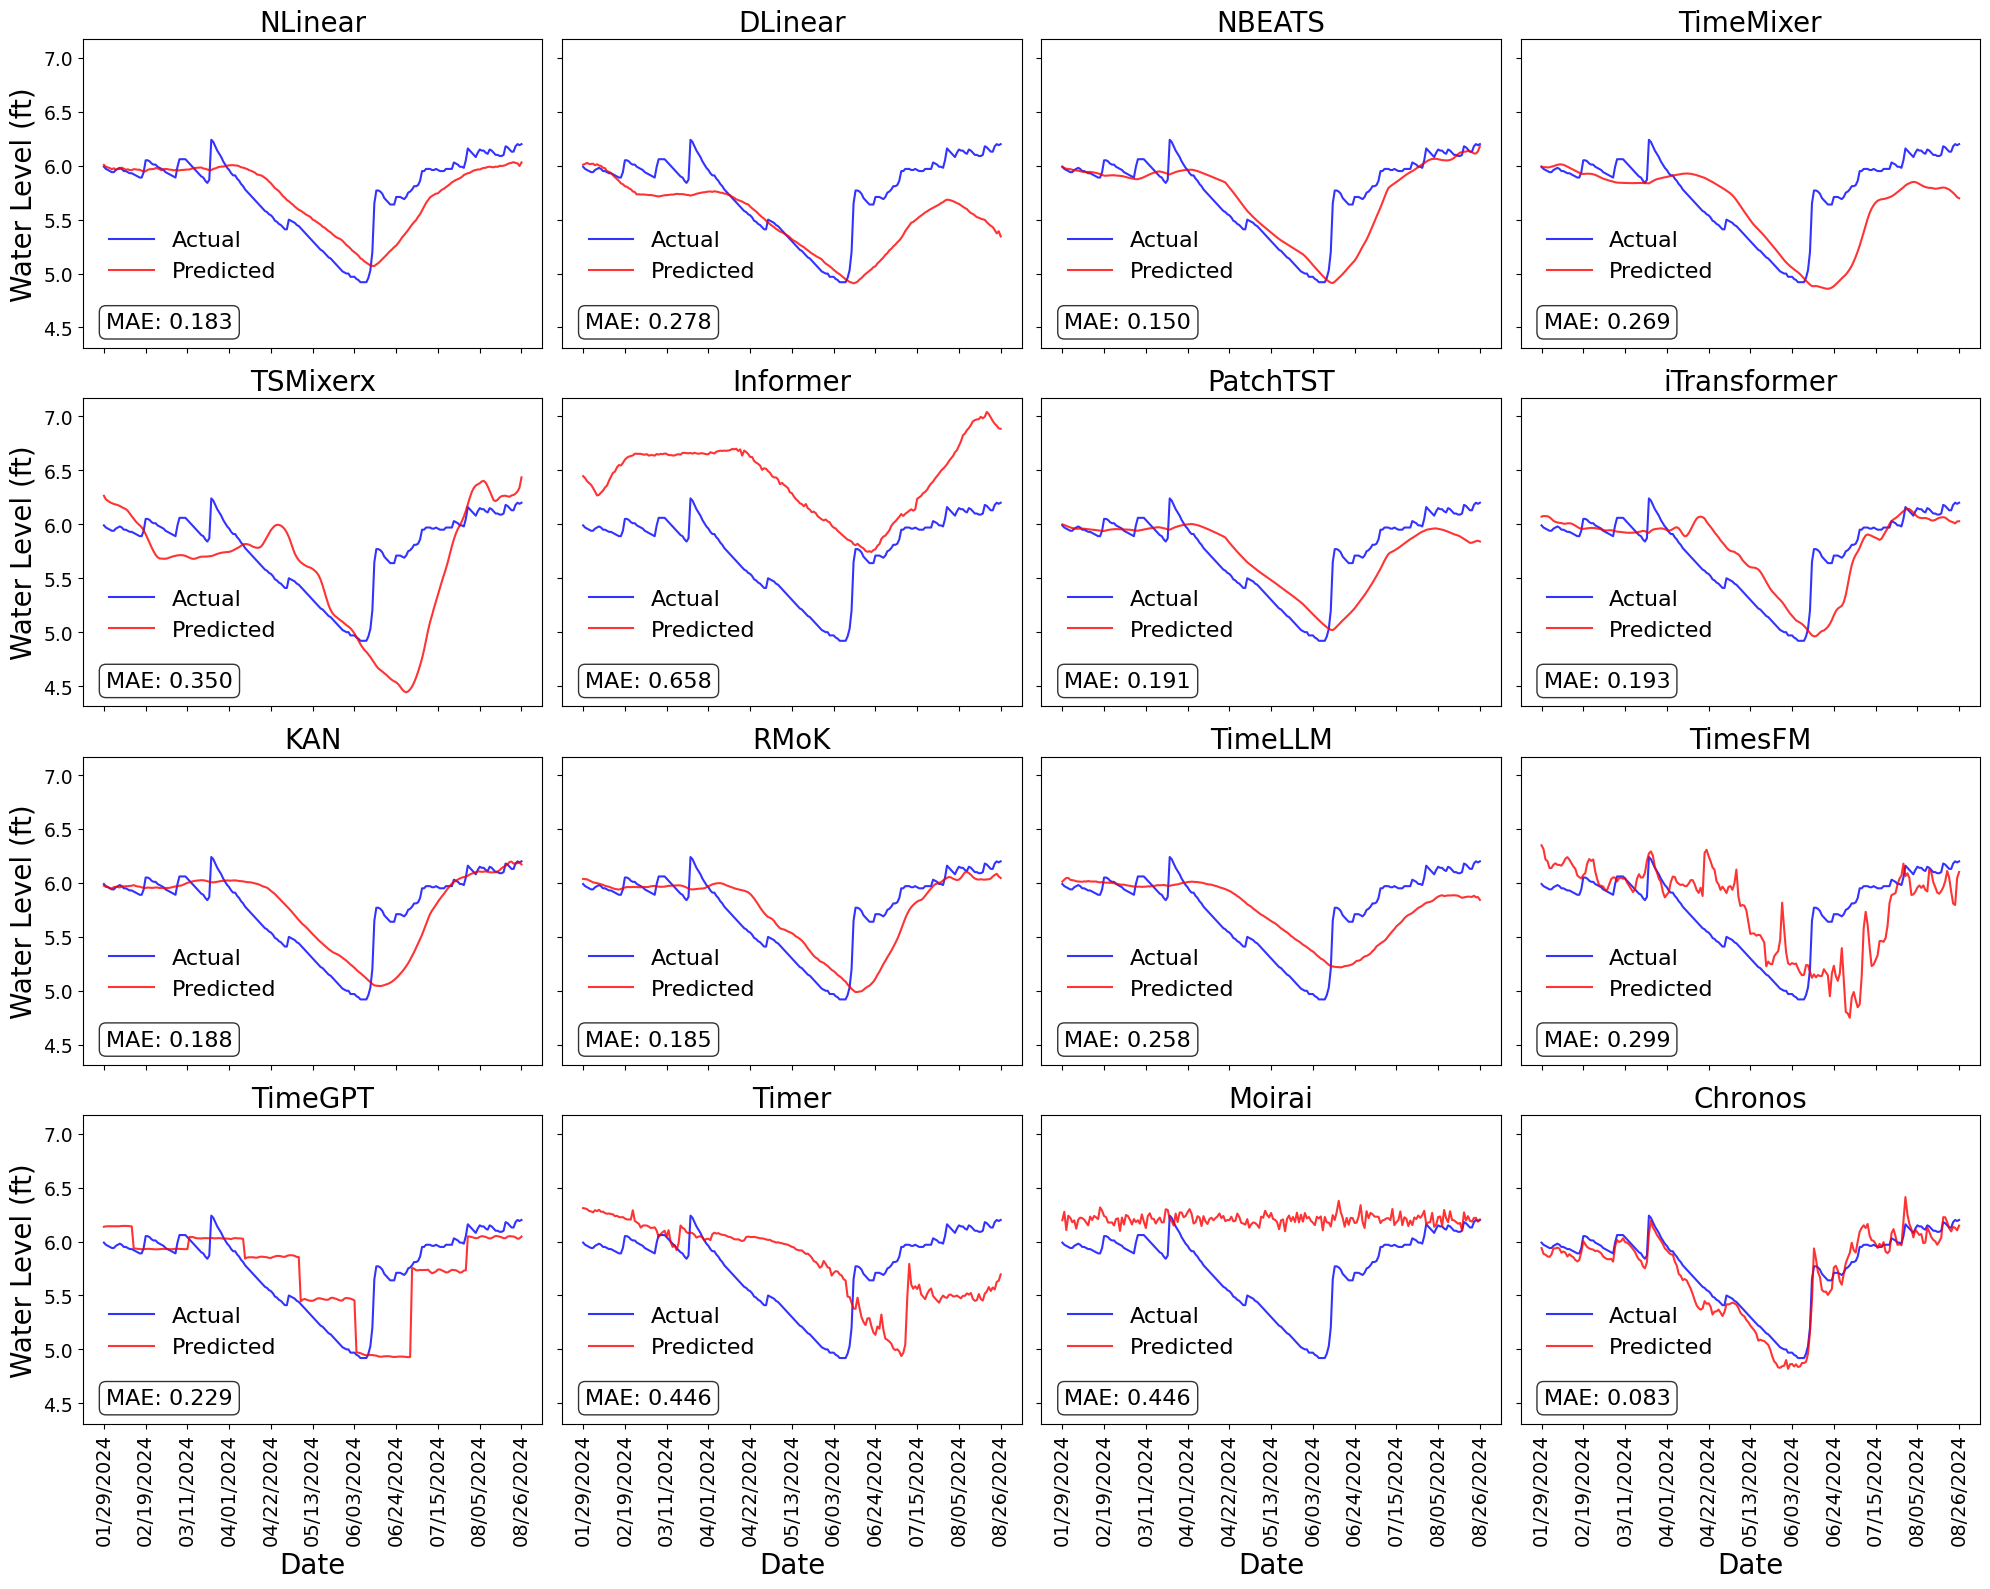

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Define models from dataset columns (excluding 'unique_id', 'ds', 'y', 'date')
model_columns = ["NLinear", "DLinear", "NBEATS", "TimeMixer", "TSMixerx", 
                 "Informer", "PatchTST", "iTransformer", "KAN", "RMoK", 
                 "TimeLLM", "TimesFM", "TimeGPT", "Timer", "Moirai", "Chronos"]

# Filter dataset for NP205_stage
filtered_dataset = data[data['unique_id'] == 'G620_water_level']
# Rename 'timesfm' to 'TimesFM'
filtered_dataset.rename(columns={'timesfm': 'TimesFM'}, inplace=True)

# Set up subplots (4 rows, 4 columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16), sharex=True, sharey=True) 
axes = axes.flatten()  # Flatten for easier iteration

# Loop through each model and plot predictions
for i, model in enumerate(model_columns):
    ax = axes[i]
    
    # Compute MAE
    mae = (filtered_dataset[model] - filtered_dataset['y']).abs().mean()
    
    # Plot actual vs. predicted values
    ax.plot(filtered_dataset['date'], filtered_dataset['y'], label='Actual', color='blue', alpha=0.8)
    ax.plot(filtered_dataset['date'], filtered_dataset[model], label=f'Predicted', color='red', alpha=0.8)
    
    # Title and formatting
    ax.set_title(f"{model}", fontsize=20)
    ax.legend(loc='lower right', fontsize=12)
    ax.set_ylabel('Water Level (ft)',fontsize=20 )
    ax.set_xlabel('Date', fontsize=20)

    # Position legend slightly above the bottom-left area without a box
    ax.legend(loc='lower left', fontsize=16, bbox_to_anchor=(0.014, 0.15), frameon=False)  

    # Add MAE annotation below the legend
    ax.text(0.05, 0.05, f"MAE: {mae:.3f}", transform=ax.transAxes, fontsize=16, color='black',
            verticalalignment='bottom', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.3'))
    
    # Reduce x-ticks for clarity
    xticks = ax.get_xticks()
    ax.set_xticks(xticks[::max(1, len(xticks)//10)])  # Show fewer ticks
    
    # Rotate x-axis labels and set font size
    ax.tick_params(axis='x', rotation=90, labelsize=14)  # Adjust the font size (change 12 to your preferred size)
    ax.tick_params(axis='y', labelsize=13.5)  # Adjust the font size for y-ticks

    # Hide x-labels on inner subplots to reduce clutter
    ax.label_outer()

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_1661608/3007183247.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.rename(columns={'timesfm': 'TimesFM'}, inplace=True)


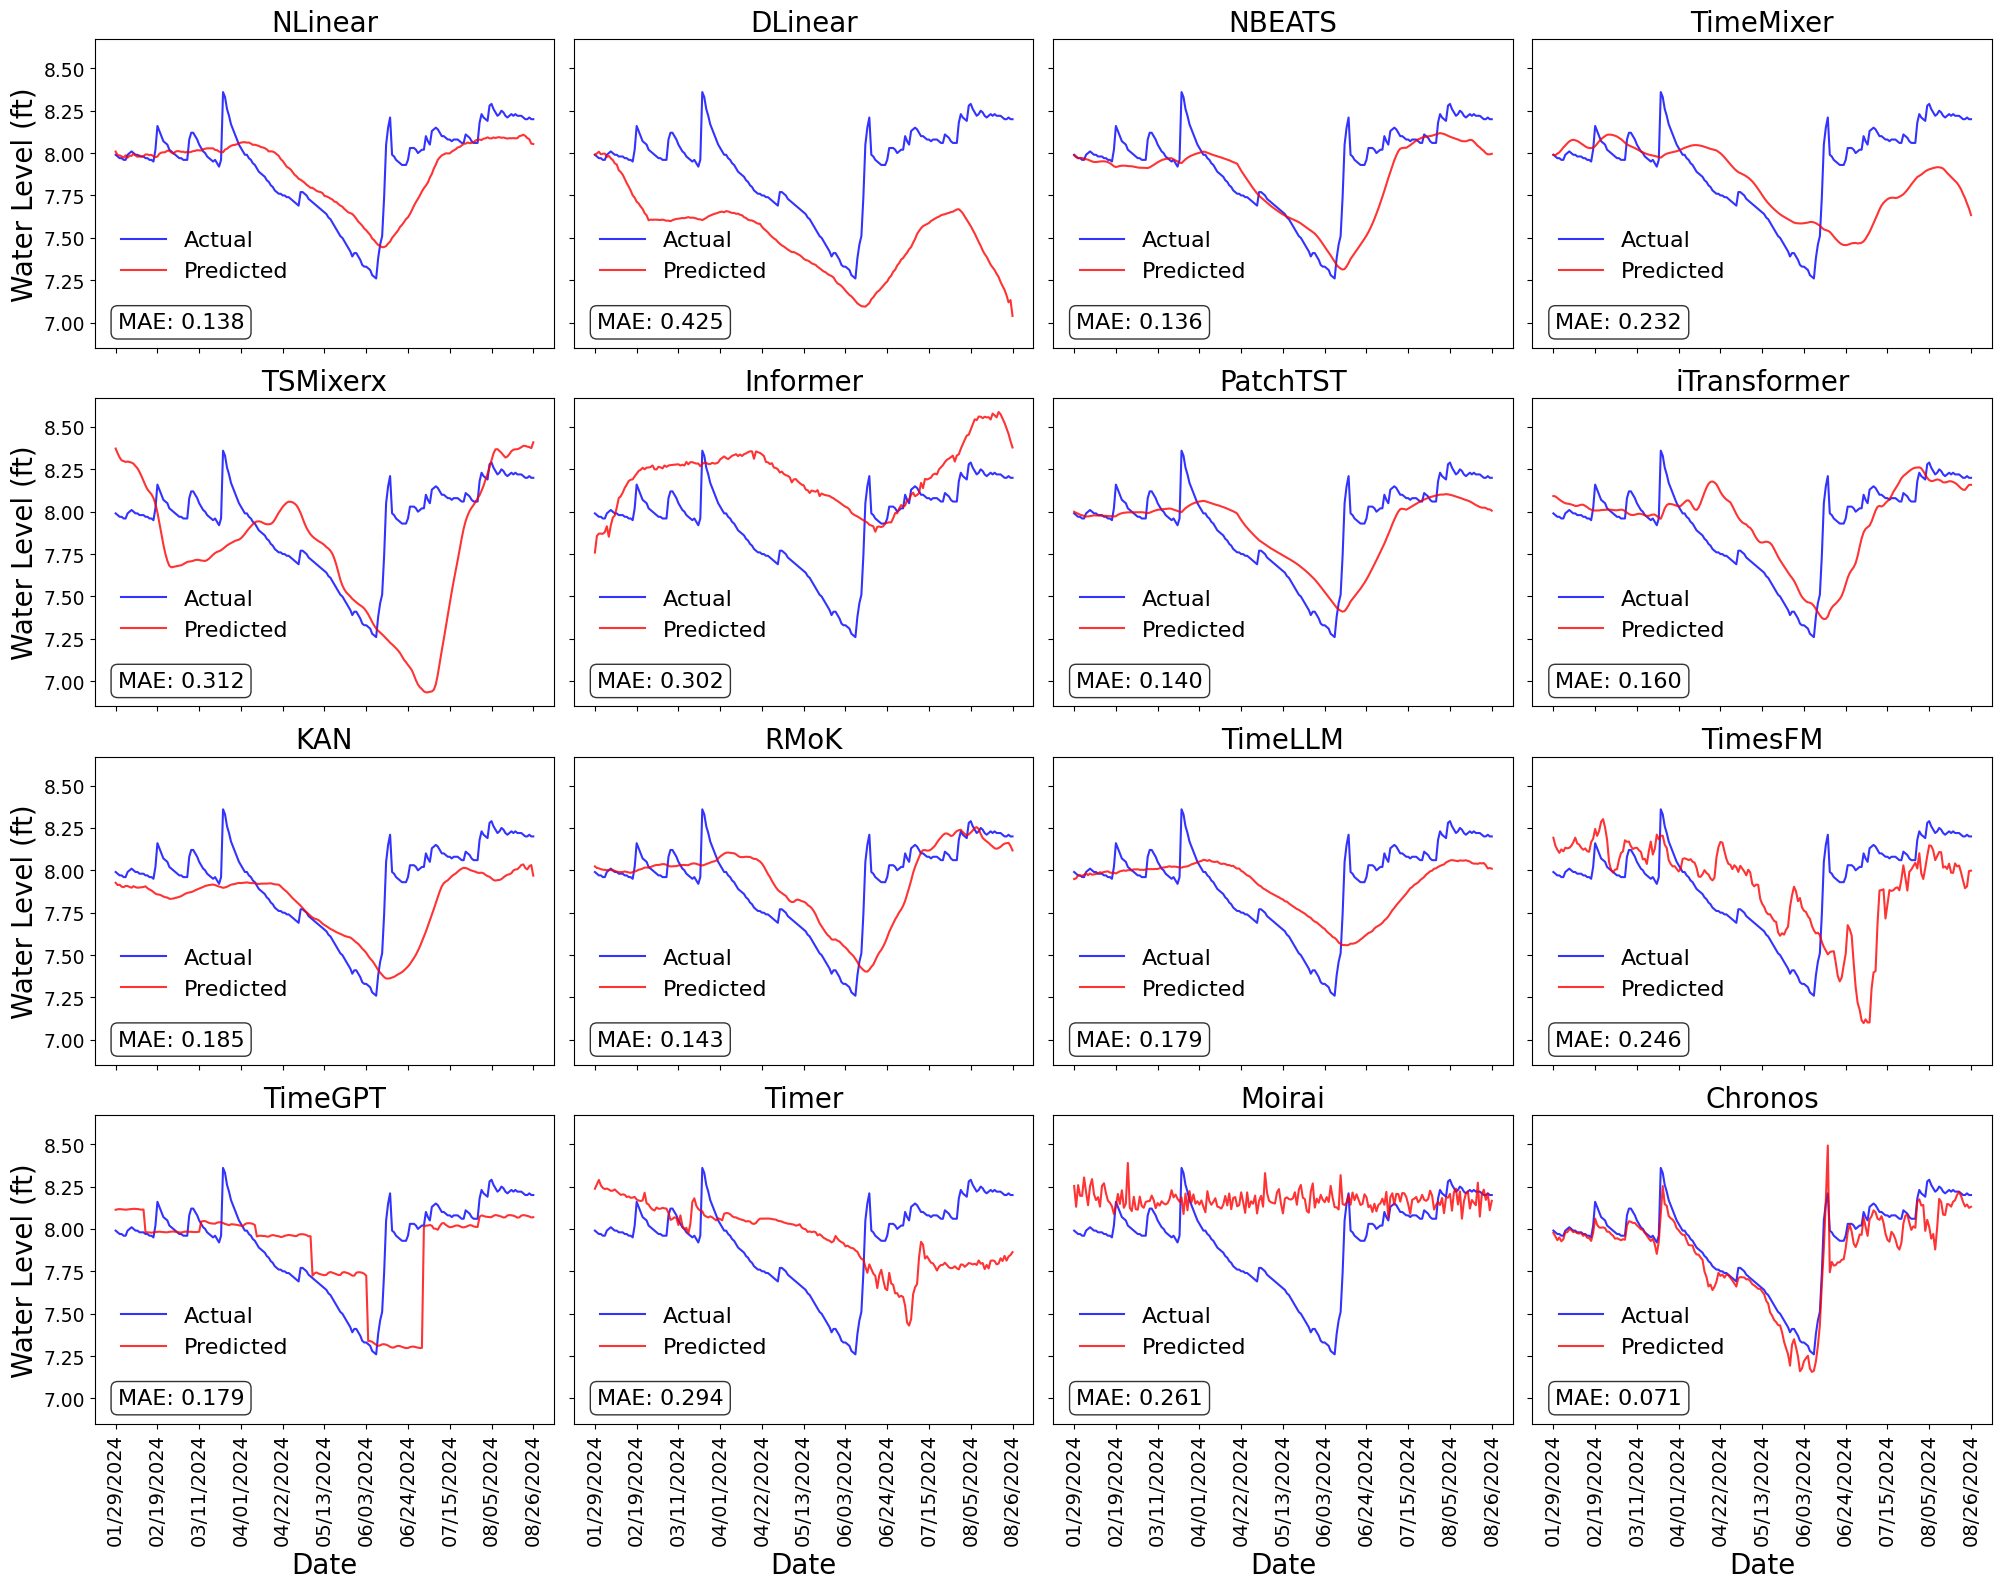

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Define models from dataset columns (excluding 'unique_id', 'ds', 'y', 'date')
model_columns = ["NLinear", "DLinear", "NBEATS", "TimeMixer", "TSMixerx", 
                 "Informer", "PatchTST", "iTransformer", "KAN", "RMoK", 
                 "TimeLLM", "TimesFM", "TimeGPT", "Timer", "Moirai", "Chronos"]

# Filter dataset for NP205_stage
filtered_dataset = data[data['unique_id'] == 'NESRS1']
# Rename 'timesfm' to 'TimesFM'
filtered_dataset.rename(columns={'timesfm': 'TimesFM'}, inplace=True)

# Set up subplots (4 rows, 4 columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16), sharex=True, sharey=True) 
axes = axes.flatten()  # Flatten for easier iteration

# Loop through each model and plot predictions
for i, model in enumerate(model_columns):
    ax = axes[i]
    
    # Compute MAE
    mae = (filtered_dataset[model] - filtered_dataset['y']).abs().mean()
    
    # Plot actual vs. predicted values
    ax.plot(filtered_dataset['date'], filtered_dataset['y'], label='Actual', color='blue', alpha=0.8)
    ax.plot(filtered_dataset['date'], filtered_dataset[model], label=f'Predicted', color='red', alpha=0.8)
    
    # Title and formatting
    ax.set_title(f"{model}", fontsize=20)
    ax.legend(loc='lower right', fontsize=12)
    ax.set_ylabel('Water Level (ft)',fontsize=20 )
    ax.set_xlabel('Date', fontsize=20)

    # Position legend slightly above the bottom-left area without a box
    ax.legend(loc='lower left', fontsize=16, bbox_to_anchor=(0.014, 0.15), frameon=False)  

    # Add MAE annotation below the legend
    ax.text(0.05, 0.05, f"MAE: {mae:.3f}", transform=ax.transAxes, fontsize=16, color='black',
            verticalalignment='bottom', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.3'))
    
    # Reduce x-ticks for clarity
    xticks = ax.get_xticks()
    ax.set_xticks(xticks[::max(1, len(xticks)//10)])  # Show fewer ticks
    
    # Rotate x-axis labels and set font size
    ax.tick_params(axis='x', rotation=90, labelsize=14)  # Adjust the font size (change 12 to your preferred size)
    ax.tick_params(axis='y', labelsize=13.5)  # Adjust the font size for y-ticks

    # Hide x-labels on inner subplots to reduce clutter
    ax.label_outer()

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_1661608/1652647541.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.rename(columns={'timesfm': 'TimesFM'}, inplace=True)


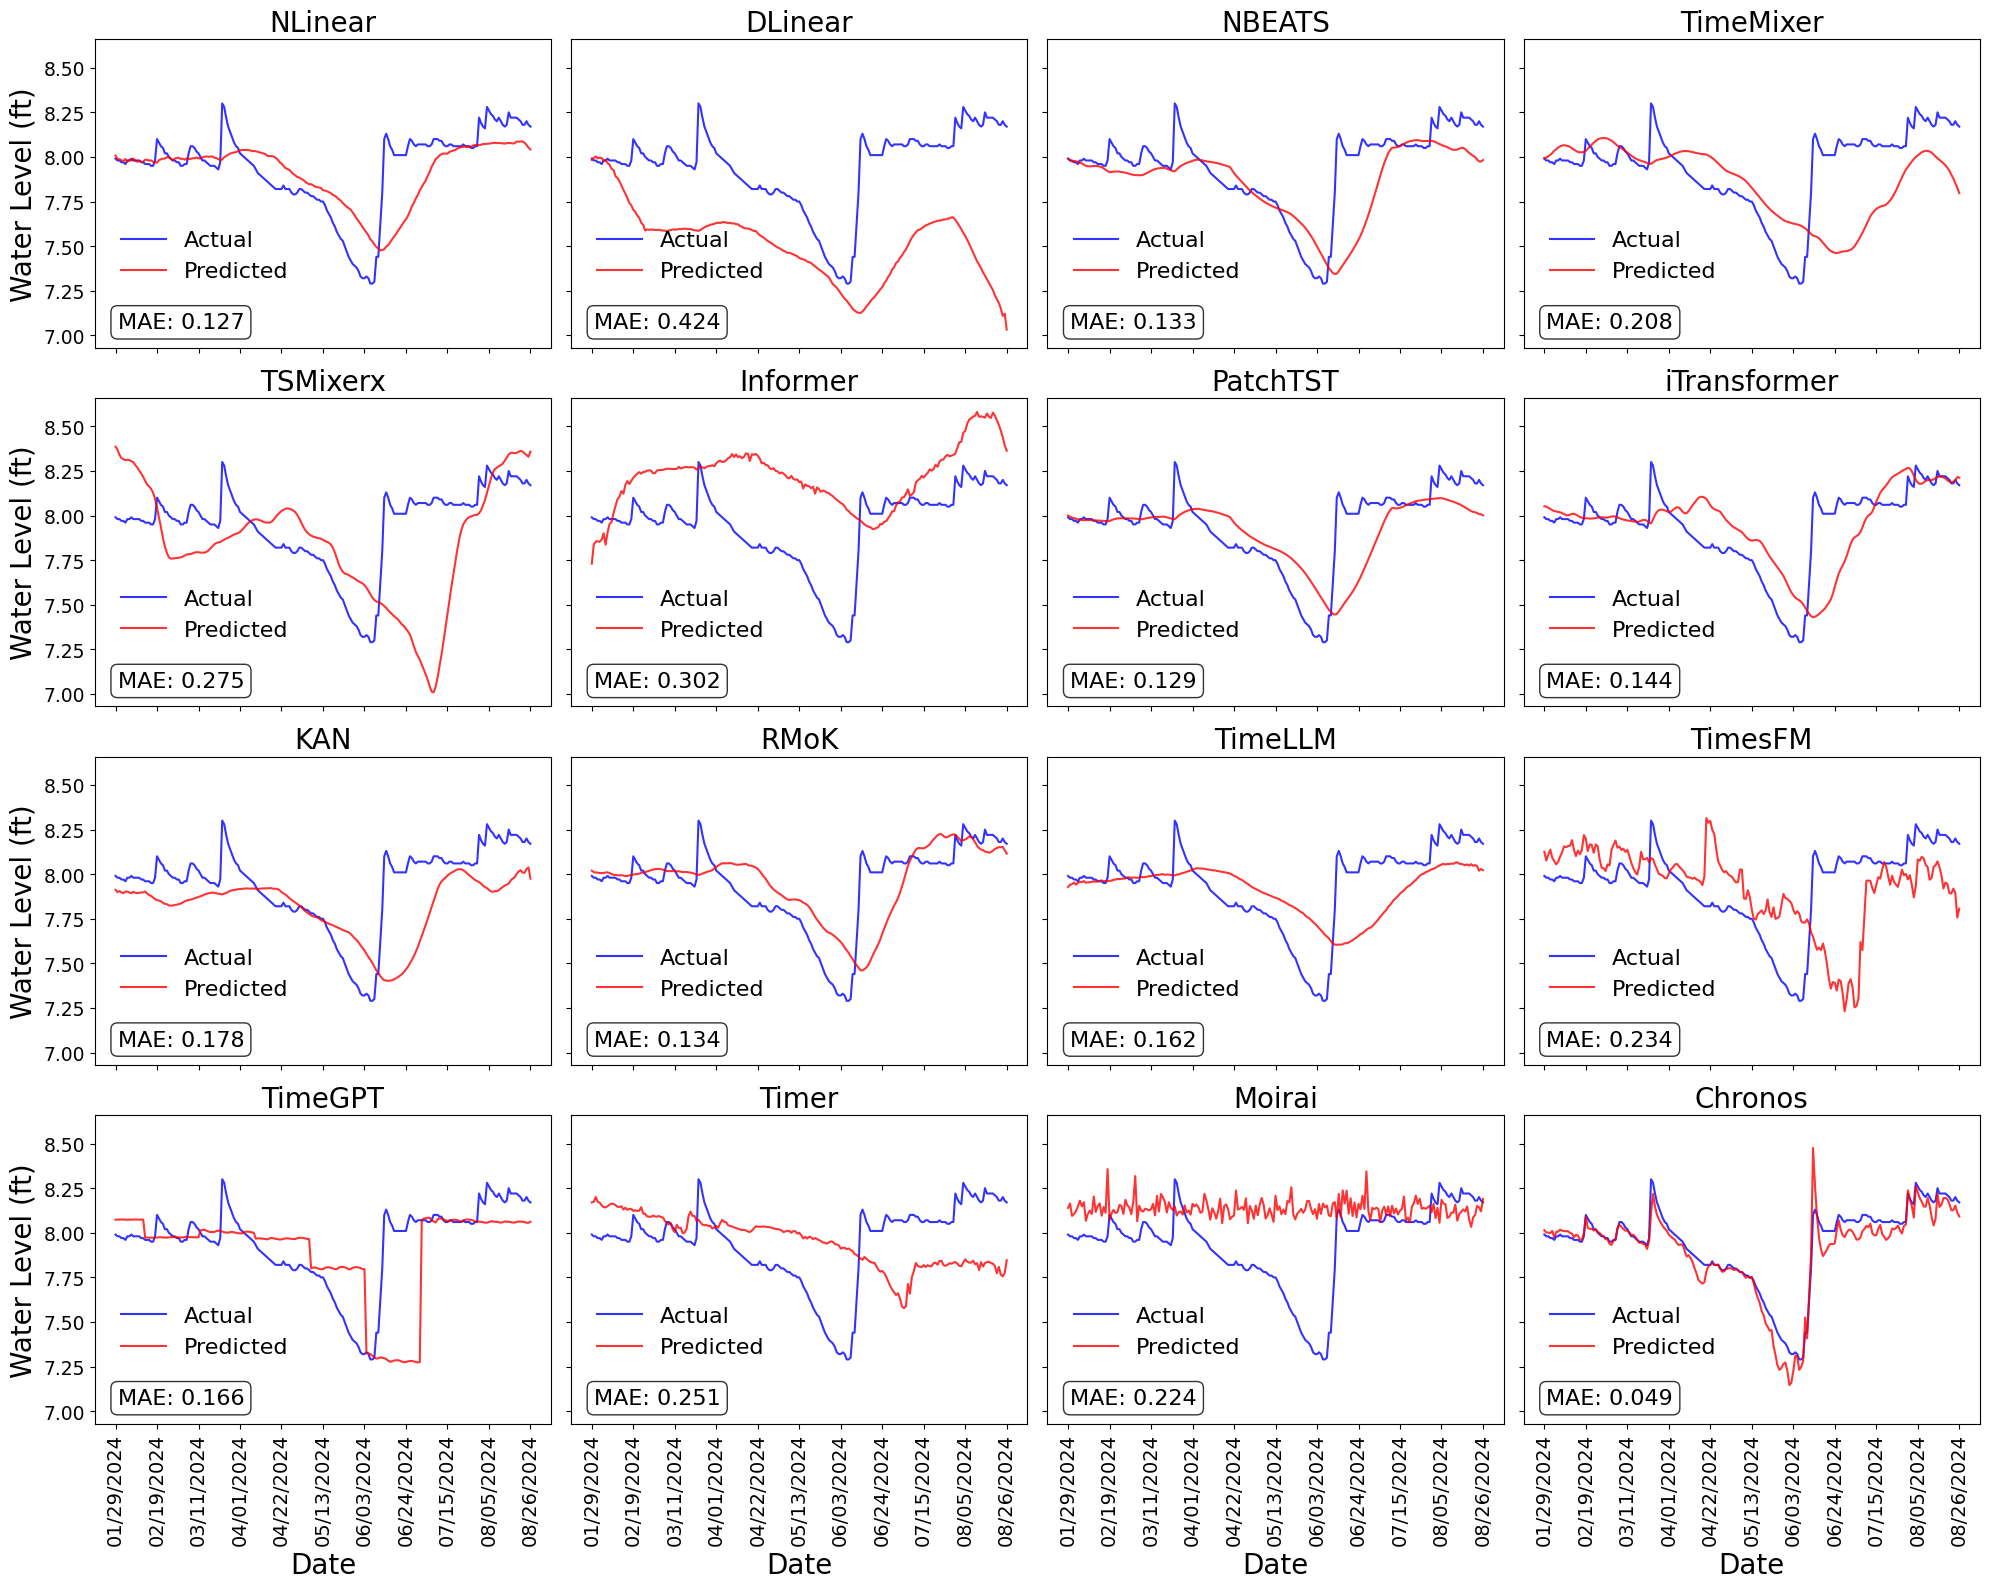

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Define models from dataset columns (excluding 'unique_id', 'ds', 'y', 'date')
model_columns = ["NLinear", "DLinear", "NBEATS", "TimeMixer", "TSMixerx", 
                 "Informer", "PatchTST", "iTransformer", "KAN", "RMoK", 
                 "TimeLLM", "TimesFM", "TimeGPT", "Timer", "Moirai", "Chronos"]

# Filter dataset for NP205_stage
filtered_dataset = data[data['unique_id'] == 'NESRS2']
# Rename 'timesfm' to 'TimesFM'
filtered_dataset.rename(columns={'timesfm': 'TimesFM'}, inplace=True)

# Set up subplots (4 rows, 4 columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16), sharex=True, sharey=True) 
axes = axes.flatten()  # Flatten for easier iteration

# Loop through each model and plot predictions
for i, model in enumerate(model_columns):
    ax = axes[i]
    
    # Compute MAE
    mae = (filtered_dataset[model] - filtered_dataset['y']).abs().mean()
    
    # Plot actual vs. predicted values
    ax.plot(filtered_dataset['date'], filtered_dataset['y'], label='Actual', color='blue', alpha=0.8)
    ax.plot(filtered_dataset['date'], filtered_dataset[model], label=f'Predicted', color='red', alpha=0.8)
    
    # Title and formatting
    ax.set_title(f"{model}", fontsize=20)
    ax.legend(loc='lower right', fontsize=12)
    ax.set_ylabel('Water Level (ft)',fontsize=20 )
    ax.set_xlabel('Date', fontsize=20)

    # Position legend slightly above the bottom-left area without a box
    ax.legend(loc='lower left', fontsize=16, bbox_to_anchor=(0.014, 0.15), frameon=False)  

    # Add MAE annotation below the legend
    ax.text(0.05, 0.05, f"MAE: {mae:.3f}", transform=ax.transAxes, fontsize=16, color='black',
            verticalalignment='bottom', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.3'))
    
    # Reduce x-ticks for clarity
    xticks = ax.get_xticks()
    ax.set_xticks(xticks[::max(1, len(xticks)//10)])  # Show fewer ticks
    
    # Rotate x-axis labels and set font size
    ax.tick_params(axis='x', rotation=90, labelsize=14)  # Adjust the font size (change 12 to your preferred size)
    ax.tick_params(axis='y', labelsize=13.5)  # Adjust the font size for y-ticks

    # Hide x-labels on inner subplots to reduce clutter
    ax.label_outer()

# Adjust layout
plt.tight_layout()
plt.show()
